In [73]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 501)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
raw = pd.read_excel('/Users/andrew/OneDrive - Williams College/Data Science Projects/AllDataCombined.xlsx')
raw

,condition,counterbalance,assignmentId,workerId,hitId,currenttrial,bonus,data__current_trial,data__dateTime,data__trialdata__block,...,questiondata__haveYouTakenThisStudyBefore?,eventdata__eventtype,eventdata__interval,eventdata__timestamp,eventdata__value__001,eventdata__value__002,eventdata__value,useragent,mode,status
0,1.0,1.0,3N2BF7Y2VQUZUO31Z7U45XYKNGRMHM,A3C0NQ2IP5FTZQ,37MQ8Z1JQEWTMVR49NA6O4K78REY21,36.0,0.0,0.0,1.582330e+12,NaN,...,No,initialized,0.0,1.582330e+12,NaN,NaN,NaN,Mozilla/5.0 (Windows NT 6.2; Win64; x64) Apple...,live,user data saved
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.582330e+12,NaN,...,NaN,window_resize,0.0,1.582330e+12,1881.0,930.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.582330e+12,NaN,...,NaN,focus,16657.0,1.582330e+12,NaN,NaN,on,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.582330e+12,2.0,...,NaN,focus,118436.0,1.582330e+12,NaN,NaN,off,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.582330e+12,2.0,...,NaN,focus,0.0,1.582330e+12,NaN,NaN,off,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,1.582397e+12,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,1.582397e+12,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,1.582397e+12,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,1.582397e+12,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean data:

In [259]:
data = raw

# Forward fill workerId
data['workerId'].ffill(inplace=True)

# Get the participants that didn't finish all 152 trials
didnt_finish = data.groupby(['workerId'])['data__current_trial'].max()
didnt_finish = list(didnt_finish[didnt_finish != 151.0].index)
didnt_finish

# Get participants that took the study before
already_took = data[data['questiondata__haveYouTakenThisStudyBefore?']=='Yes']['workerId']
already_took = list(already_took)

# Concatenate dataframes
drop_participants = didnt_finish + already_took
drop_participants

# Drop participants 
data = data[data['workerId'].apply(lambda worker: not worker in drop_participants)]

# # Check if the right participants were dropped
# for p in drop_participants:
#     print(p in data['workerId'].unique()) # Only False, so no problems
    
# Get only relevant columns
data = data[['workerId','data__trialdata__condition','data__current_trial','data__trialdata__hit',
             'questiondata__metacognitive','questiondata__explain','questiondata__technicalIssues?']]

# Rename columns
data.rename(columns={'workerId': 'participant',
                     'data__trialdata__condition': 'condition',
                     'data__current_trial': 'trial',
                     'data__trialdata__hit': 'acc',
                     'questiondata__metacognitive': 'meta',
                     'questiondata__technicalIssues?': 'had_tech_issues',
                     'questiondata__explain': 'tech_issues_explained'
                    }, inplace=True)

# Assign blocks
def assign_block(trial):
    if trial >= 3 and trial <= 18:
        return 1
    elif trial >= 19 and trial <= 34:
        return 2
    elif trial >= 37 and trial <= 52:
        return 3
    elif trial >= 53 and trial <= 68:
        return 4
    elif trial >= 69 and trial <= 84:
        return 5
    elif trial >= 85 and trial <= 100:
        return 6
    elif trial >= 101 and trial <= 116:
        return 7
    elif trial >= 119 and trial <= 134:
        return 8
    elif trial >= 135 and trial <= 150:
        return 9
    else:
        return np.nan
data['block'] = [assign_block(trial) for trial in data['trial']]

# Assign phases
def assign_phase(block):
    if block in [1,2]:
        return 'category_learning'
    elif block in [3,4,5,6,7]:
        return 'training'
    elif block in [8,9]:
        return 'testing'
    else:
        return np.nan
data['phase'] = [assign_phase(block) for block in data['block']]
data


,participant,condition,trial,acc,meta,tech_issues_explained,had_tech_issues,block,phase
43,AFIK3VBMMX6G6,NaN,0.0,NaN,6.0,NaN,No,NaN,NaN
44,AFIK3VBMMX6G6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
45,AFIK3VBMMX6G6,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
46,AFIK3VBMMX6G6,blocked,3.0,0.0,NaN,NaN,NaN,1.0,category_learning
47,AFIK3VBMMX6G6,blocked,4.0,0.0,NaN,NaN,NaN,1.0,category_learning
...,...,...,...,...,...,...,...,...,...
21956,A3EIS965KC1BJR,interleaved,147.0,0.0,NaN,NaN,NaN,9.0,testing
21957,A3EIS965KC1BJR,interleaved,148.0,0.0,NaN,NaN,NaN,9.0,testing
21958,A3EIS965KC1BJR,interleaved,149.0,0.0,NaN,NaN,NaN,9.0,testing
21959,A3EIS965KC1BJR,interleaved,150.0,0.0,NaN,NaN,NaN,9.0,testing


### Visualize data:

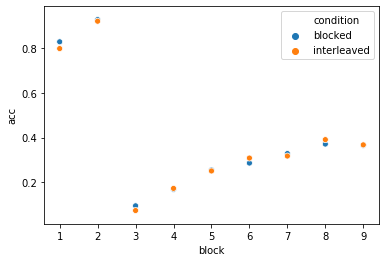

In [313]:
means_by_block = data.groupby(['condition','participant','block']).mean().reset_index()
across_participants = means_by_block.groupby(['condition','block']).mean()
across_participants.reset_index(inplace=True)

# Graph accuracy versus. block/time, divided into hue
sns.scatterplot(x='block', y='acc', data=across_participants, hue='condition')

### Divide into upper, middle, lower scorers in test phase:

In [277]:
# Average both testing blocks for each participant
testing = data.groupby(['condition','participant','phase']).mean().xs('testing', level='phase')
blocked = testing.loc['blocked']
interleaved = testing.loc['interleaved']

# Get bounds for 3 quartiles
blocked_67 = blocked['acc'].quantile(0.67)
blocked_33 = blocked['acc'].quantile(0.33)
interleaved_67 = interleaved['acc'].quantile(0.67)
interleaved_33 = interleaved['acc'].quantile(0.33)

# Divide conditions into upper, middle, lower performers
blocked_upper = blocked[blocked['acc']>=blocked_67]
blocked_middle = blocked[(blocked['acc']>=blocked_33) & (blocked['acc']<blocked_67)]
blocked_lower = blocked[blocked['acc']<blocked_33]
interleaved_upper = interleaved[interleaved['acc']>=interleaved_67]
interleaved_middle = interleaved[(interleaved['acc']>=interleaved_33) & (interleaved['acc']<interleaved_67)]
interleaved_lower = interleaved[interleaved['acc']<interleaved_33]

# Get list of participants for upper, middle, lower performers in each condition
blocked_upper = list(blocked_upper.reset_index()['participant'])
blocked_middle = list(blocked_middle.reset_index()['participant'])
blocked_lower = list(blocked_lower.reset_index()['participant'])
interleaved_upper = list(interleaved_upper.reset_index()['participant'])
interleaved_middle = list(interleaved_middle.reset_index()['participant'])
interleaved_lower = list(interleaved_lower.reset_index()['participant'])

# Get dataframes of each tier
blocked_upper = means_by_block[means_by_block['participant'].apply(lambda p: p in blocked_upper)]
blocked_middle = means_by_block[means_by_block['participant'].apply(lambda p: p in blocked_middle)]
blocked_lower = means_by_block[means_by_block['participant'].apply(lambda p: p in blocked_lower)]
interleaved_upper = means_by_block[means_by_block['participant'].apply(lambda p: p in interleaved_upper)]
interleaved_middle = means_by_block[means_by_block['participant'].apply(lambda p: p in interleaved_middle)]
interleaved_lower = means_by_block[means_by_block['participant'].apply(lambda p: p in interleaved_lower)]


,index,condition,participant,block,trial,acc,meta
63,63,blocked,A1IHSU4V83S0QP,1.0,10.5,1.0000,NaN
64,64,blocked,A1IHSU4V83S0QP,2.0,26.5,1.0000,NaN
65,65,blocked,A1IHSU4V83S0QP,3.0,44.5,0.1250,NaN
66,66,blocked,A1IHSU4V83S0QP,4.0,60.5,0.3125,NaN
67,67,blocked,A1IHSU4V83S0QP,5.0,76.5,0.3125,NaN
68,68,blocked,A1IHSU4V83S0QP,6.0,92.5,0.3750,NaN
69,69,blocked,A1IHSU4V83S0QP,7.0,108.5,0.4375,NaN
70,70,blocked,A1IHSU4V83S0QP,8.0,126.5,0.6875,NaN
71,71,blocked,A1IHSU4V83S0QP,9.0,142.5,0.6875,NaN
81,81,blocked,A1WR3WTEHJEY2D,1.0,10.5,1.0000,NaN


### Graph conditions for each score tier:

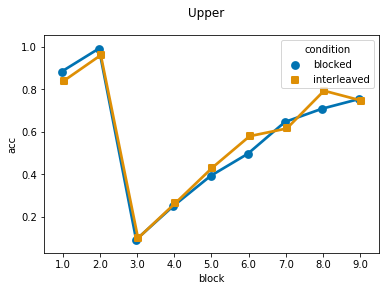

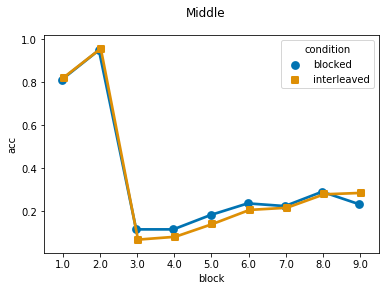

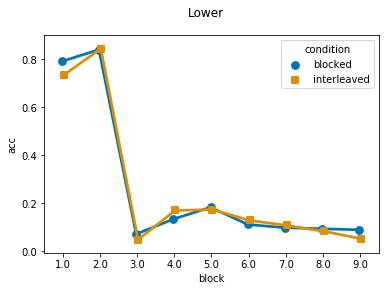

In [321]:
# Upper, middle, lower dataframes
upper = pd.concat([blocked_upper,interleaved_upper])
middle = pd.concat([blocked_middle,interleaved_middle])
lower = pd.concat([blocked_lower,interleaved_lower])

# Graph upper
upper_across_participants = upper.groupby(['condition','block']).mean().reset_index()
plt.figure().suptitle('Upper')
sns.pointplot(x='block', y='acc', data=upper_across_participants, hue='condition', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

# Graph middle
middle_across_participants = middle.groupby(['condition','block']).mean().reset_index()
plt.figure().suptitle('Middle')
sns.pointplot(x='block', y='acc', data=middle_across_participants, hue='condition', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

# Graph lower
lower_across_participants = lower.groupby(['condition','block']).mean().reset_index()
plt.figure().suptitle('Lower')
sns.pointplot(x='block', y='acc', data=lower_across_participants, hue='condition', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

# Set indices
upper_across_participants.set_index(['condition','block'], inplace=True)
middle_across_participants.set_index(['condition','block'], inplace=True)
lower_across_participants.set_index(['condition','block'], inplace=True)


### Compare conditions in each tiers:

In [330]:
from scipy.stats import ttest_rel
from pingouin import mixed_anova

dfs = [upper, middle, lower]
for df in dfs:
    df = df[(df['block']==8.0) | (df['block']==9.0)]
    print(mixed_anova(data=df, dv='acc', between='condition', within='block', subject='participant'))
    print()



        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0    condition  0.024833    1   32  0.024833  0.508556  0.480933  0.015644   
1        block  0.000517    1   32  0.000517  0.064850  0.800617  0.002022   
2  Interaction  0.035386    1   32  0.035386  4.438669  0.043064  0.121812   

   eps  
0  NaN  
1  1.0  
2  NaN  

        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0    condition  0.006973    1   32  0.006973  0.318644  0.576360  0.009859   
1        block  0.008272    1   32  0.008272  1.678948  0.204333  0.049852   
2  Interaction  0.017660    1   32  0.017660  3.584374  0.067399  0.100729   

   eps  
0  NaN  
1  1.0  
2  NaN  

        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0    condition  0.008929    1   30  0.008929  3.870968  0.058434  0.114286   
1        block  0.006104    1   30  0.006104  1.312500  0.261000  0.041916   
2  Interaction  0.002825    1   30  0.002825  0.607500  0.441836  